<a href="https://colab.research.google.com/github/LakshaySharma10/Basics_Machine_Learning/blob/main/Stress_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path="/content/drive/MyDrive/SaYoPillow.csv"
df=pd.read_csv(path)

In [5]:
df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [7]:
df.shape

(630, 9)

In [8]:
df.describe()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


In [9]:
df.corr()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
sr,1.000000,0.976268,-0.902475,0.981078,-0.903140,0.950600,-0.920554,0.976268,0.975322
rr,0.976268,1.000000,-0.889237,0.991738,-0.889210,0.935572,-0.891855,1.000000,0.963516
t,-0.902475,-0.889237,1.000000,-0.896412,0.998108,-0.857299,0.954860,-0.889237,-0.962354
lm,0.981078,0.991738,-0.896412,1.000000,-0.898527,0.964703,-0.901102,0.991738,0.971071
bo,-0.903140,-0.889210,0.998108,-0.898527,1.000000,-0.862136,0.950189,-0.889210,-0.961092
rem,0.950600,0.935572,-0.857299,0.964703,-0.862136,1.000000,-0.893952,0.935572,0.951988
sr.1,-0.920554,-0.891855,0.954860,-0.901102,0.950189,-0.893952,1.000000,-0.891855,-0.973036
hr,0.976268,1.000000,-0.889237,0.991738,-0.889210,0.935572,-0.891855,1.000000,0.963516
sl,0.975322,0.963516,-0.962354,0.971071,-0.961092,0.951988,-0.973036,0.963516,1.000000


In [14]:
df.rename(columns={'sr': 'snoring rate', 'rr':'respiration rate', 't': 'body temperature', 'lm':'limb movement', 'bo':'blood oxygen', 'rem':'eye movement', 'sr.1':'sleeping hours', 'hr':'heart rate','sl':'stress level'}, inplace=True)

In [11]:
df.columns

Index(['snoring rate', 'respiration rate', 'body temperature', 'limb movement',
       'blood oxygen', 'eye movement', 'sleeping hours', 'heart rate',
       'stress level'],
      dtype='object')

In [12]:
df.isnull().sum()

snoring rate        0
respiration rate    0
body temperature    0
limb movement       0
blood oxygen        0
eye movement        0
sleeping hours      0
heart rate          0
stress level        0
dtype: int64

<Axes: >

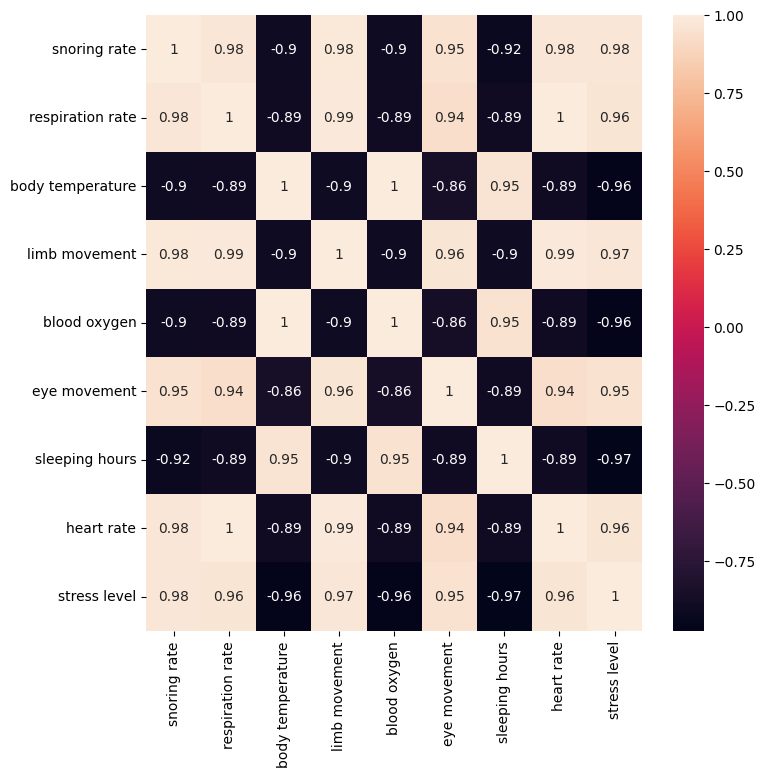

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: ylabel='Density'>

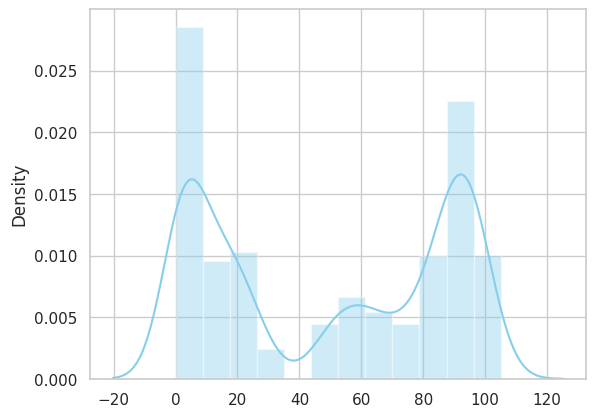

In [15]:
sns.set(style="whitegrid")
sns.distplot(df, kde=True, color="skyblue")

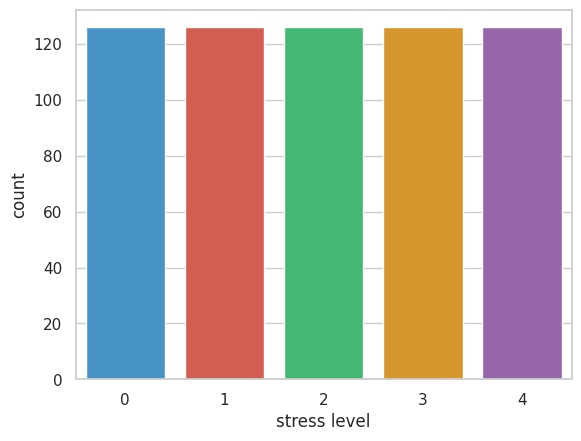

In [16]:
sns.set(style="whitegrid")
custom_palette = ["#3498db", "#e74c3c", "#2ecc71", "#f39c12", "#9b59b6"]
sns.countplot(x='stress level', data=df, palette=custom_palette)
plt.show()

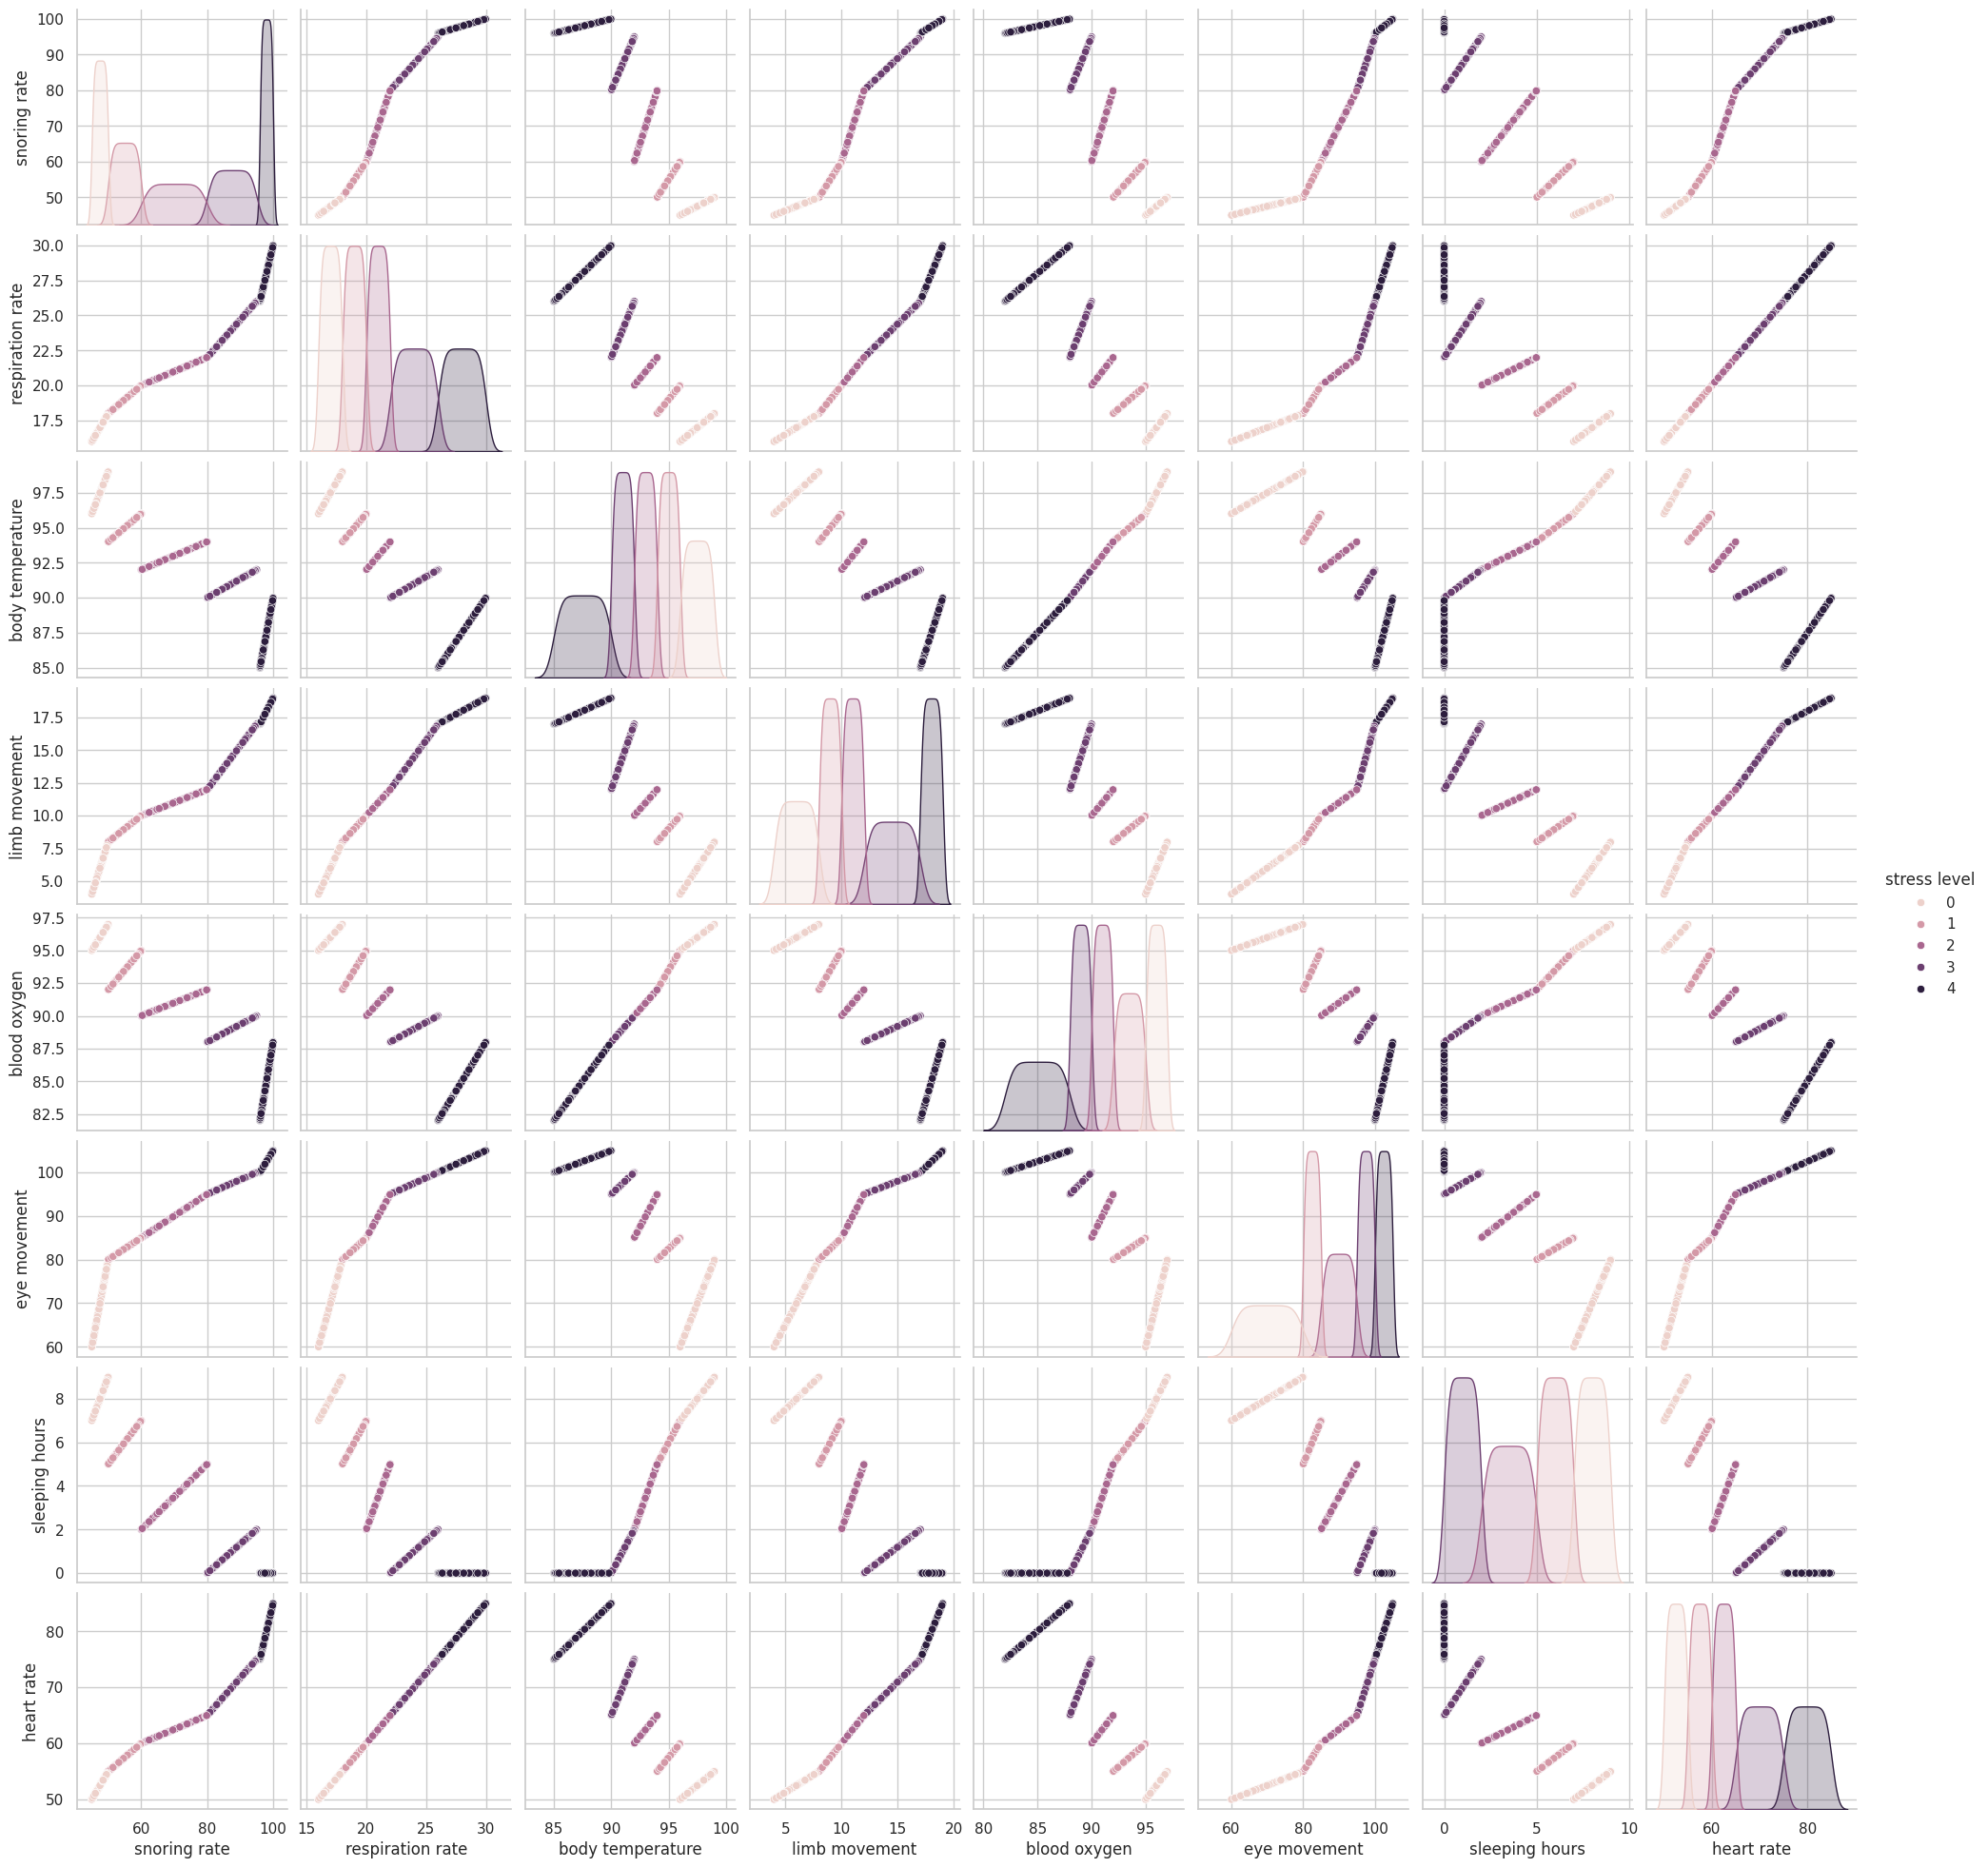

In [17]:
sns.pairplot(df, hue='stress level');
plt.show()

In [18]:
import mlxtend.preprocessing
from mlxtend.preprocessing import minmax_scaling
X = df.drop('stress level', axis=1)
y = pd.DataFrame(df['stress level'])
X_scaled = minmax_scaling(X, columns=X.columns)

In [19]:
from sklearn.feature_selection import mutual_info_regression
mi = pd.DataFrame(mutual_info_regression(X_scaled, y), columns=['MI Scores'], index=X_scaled.columns)
corr = pd.DataFrame(X_scaled[X_scaled.columns].corrwith(y['stress level']), columns=['Correlation'])
s_corr = pd.DataFrame(X_scaled[X_scaled.columns].corrwith(y['stress level'], method='spearman'),columns=['Spearman_Correlation'])
relation = mi.join(corr)
relation = relation.join(s_corr)
relation.sort_values(by='MI Scores', ascending=False)

,MI Scores,Correlation,Spearman_Correlation
snoring rate,1.597208,0.975322,0.979788
body temperature,1.595387,-0.962354,-0.979785
respiration rate,1.595058,0.963516,0.979785
blood oxygen,1.594408,-0.961092,-0.979785
heart rate,1.594000,0.963516,0.979785
limb movement,1.592003,0.971071,0.979785
eye movement,1.591732,0.951988,0.979785
sleeping hours,1.581052,-0.973036,-0.983435


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.75, test_size=0.25, random_state=42,stratify = y, shuffle=True)

**Logistic Regression**

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
acc_model_1 = round(accuracy_score(y_pred, y_test) * 100, 2)

In [22]:
print("Accuracy Score:", acc_model_1)

Accuracy Score: 100.0


**Random Forest**

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
acc_model_2 = round(accuracy_score(y_pred, y_test) * 100, 2)

In [25]:
print("Accuracy Score:", acc_model_2)

Accuracy Score: 98.73


**Linear SVC**

In [26]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)
y_pred = lsvc.predict(X_test)
acc_model_3 = round(accuracy_score(y_pred, y_test) * 100, 2)

In [27]:
print("Accuracy Score:", acc_model_3)

Accuracy Score: 100.0
